# Income Classification Model


### Introduction



The income dataset was extracted from 1994 U.S. Census database.


#### The importance of census statistics

The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and solve existing problems. Statistical information, which serves as the basis for constructing planning forecasts, is essential for the democratic process since it enables the citizens to examine the decisions made by the government and local authorities, and decide whether they serve the public they are meant to help.

Read more: Use of Census Data
Objective of the porject

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. To achieve this, several classification techniques are explored and the random forest model yields to the best prediction result.

# Importing libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.axes_style("darkgrid")

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
df= pd.read_csv('adult.data',header=-1,names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
            'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
)

In [57]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

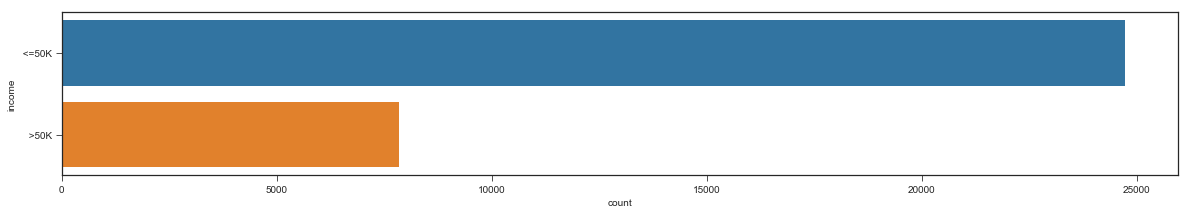

In [59]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=df)

In [60]:
df['income']= [ 0 if x==' <=50K' else 1 for x in df['income']]

In [61]:
X= df.iloc[:,:-1]
y=df.iloc[:,14].values

In [62]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [64]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [65]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [66]:
X['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

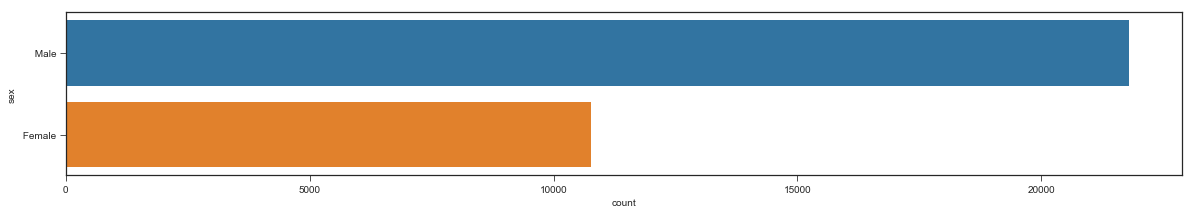

In [67]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="sex", data=df)

In [68]:
#sex
pd.crosstab(X['sex'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


In [69]:
X['sex']= [ 0 if x==' Female' else 1 for x in X['sex']]

In [70]:
#sex
pd.crosstab(X['sex'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
sex,,
0,0.890539,0.109461
1,0.694263,0.305737


In [71]:
cat = X.select_dtypes(include=['object']).copy()
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
workclass         32561 non-null object
education         32561 non-null object
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
native-country    32561 non-null object
dtypes: object(7)
memory usage: 1.7+ MB


In [72]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [73]:
cat["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

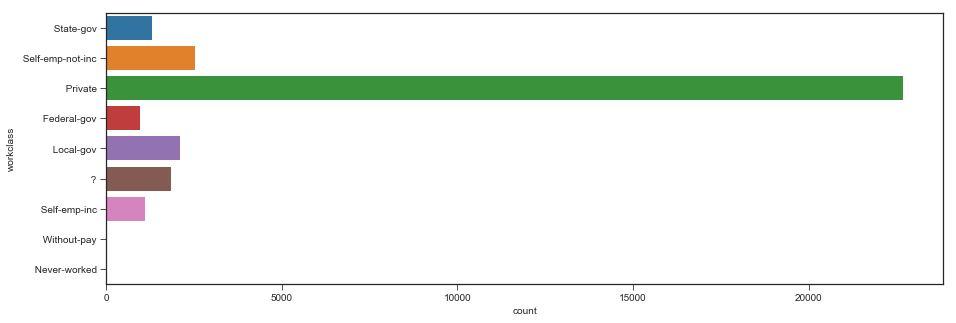

In [74]:
fig = plt.figure(figsize=(15,5))
plt.style.use('seaborn-ticks');
sns.countplot(y="workclass", data=cat);

In [75]:
print(cat['workclass'].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [76]:
pd.crosstab(cat['workclass'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
workclass,,
?,0.895969,0.104031
Federal-gov,0.613542,0.386458
Local-gov,0.705208,0.294792
Never-worked,1.000000,0.000000
Private,0.781327,0.218673
Self-emp-inc,0.442652,0.557348
Self-emp-not-inc,0.715073,0.284927
State-gov,0.728043,0.271957
Without-pay,1.000000,0.000000


In [77]:
clean_workclass= {'workclass':
                  {' ?':'?',' Federal-gov':'Federal-gov',' Local-gov':'workclass1',' Self-emp-not-inc':'workclass1',
                   ' State-gov':'workclass1',' Without-pay':'workclass2',' Never-worked':'workclass2',' Self-emp-inc':'Self-emp-inc',
                   ' Private':'Private',
                      
                  }}

In [78]:
cat.replace(clean_workclass,inplace=True)

In [79]:
pd.crosstab(cat['workclass'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
workclass,,
?,0.895969,0.104031
Federal-gov,0.613542,0.386458
Private,0.781327,0.218673
Self-emp-inc,0.442652,0.557348
workclass1,0.714430,0.285570
workclass2,1.000000,0.000000


In [80]:
cat.dtypes

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
native-country    object
dtype: object

In [81]:
cat['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

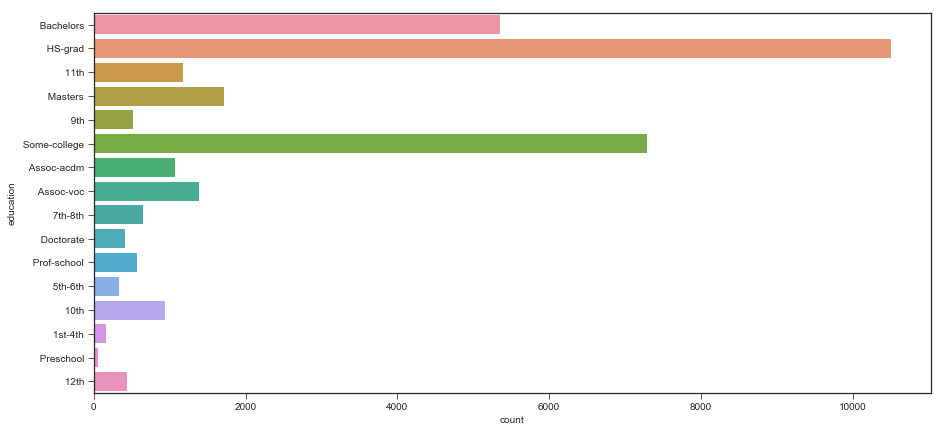

In [82]:
fig = plt.figure(figsize=(15,7))
plt.style.use('seaborn-ticks');
sns.countplot(y="education", data=cat);

In [83]:
pd.crosstab(cat['education'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


In [84]:
clean_edu= {"education":
           {' 10th': 'education1',' 11th':'education1',' 12th':'education1',' 7th-8th':'education1',' 9th':'education1',' 5th-6th':'education1',' 1st-4th':'education1',
           ' Assoc-acdm':'education2',' Assoc-voc':'education2',' Bachelors':'Bachelors',' Doctorate':'education3',
           ' Prof-school':'education3',' HS-grad':'HS-grad',' Masters':'Masters',' Preschool':'Preschool',' Some-college':'Some-college'}}

In [85]:
cat.replace(clean_edu,inplace=True)

In [86]:
cat['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
education1       4202
education2       2449
Masters          1723
education3        989
Preschool          51
Name: education, dtype: int64

In [87]:
pd.crosstab(cat['education'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
education,,
Bachelors,0.585247,0.414753
HS-grad,0.840491,0.159509
Masters,0.443413,0.556587
Preschool,1.000000,0.000000
Some-college,0.809765,0.190235
education1,0.941932,0.058068
education2,0.744385,0.255615
education3,0.262892,0.737108


In [88]:
cat['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [89]:
pd.crosstab(cat['marital-status'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
marital-status,,
Divorced,0.895791,0.104209
Married-AF-spouse,0.565217,0.434783
Married-civ-spouse,0.553152,0.446848
Married-spouse-absent,0.918660,0.081340
Never-married,0.954039,0.045961
Separated,0.935610,0.064390
Widowed,0.914401,0.085599


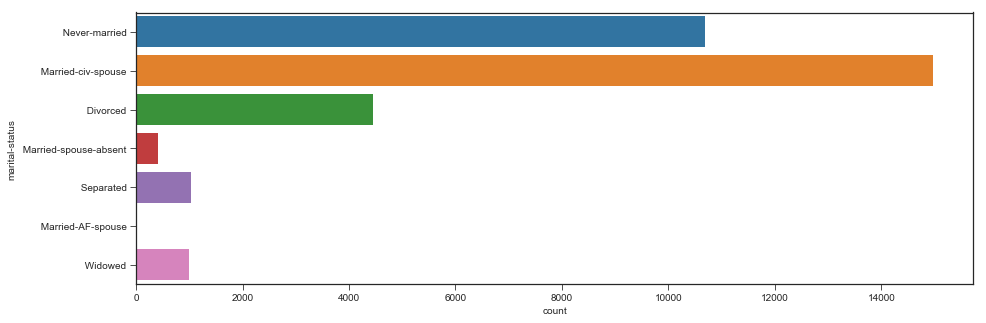

In [90]:
fig = plt.figure(figsize=(15,5))
plt.style.use('seaborn-ticks');
sns.countplot(y="marital-status", data=cat);

In [91]:
clean_marital={'marital-status':
              {' Divorced':'Divorced',' Married-AF-spouse':'marital2',' Married-civ-spouse':'marital2',
              ' Married-spouse-absent':'marital2',' Widowed':'marital2',' Separated':'Separated',' Never-married':'Never-married'}}

In [92]:
cat.replace(clean_marital,inplace=True)

In [93]:
pd.crosstab(cat['marital-status'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
marital-status,,
Divorced,0.895791,0.104209
Never-married,0.954039,0.045961
Separated,0.935610,0.064390
marital2,0.584339,0.415661


In [94]:
cat['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

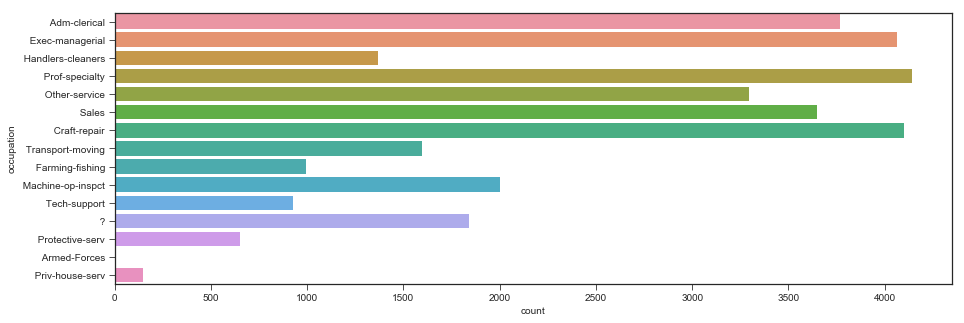

In [95]:
fig = plt.figure(figsize=(15,5))
plt.style.use('seaborn-ticks');
sns.countplot(y="occupation", data=cat);

In [96]:
pd.crosstab(cat['occupation'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
occupation,,
?,0.896365,0.103635
Adm-clerical,0.865517,0.134483
Armed-Forces,0.888889,0.111111
Craft-repair,0.773359,0.226641
Exec-managerial,0.515986,0.484014
Farming-fishing,0.884306,0.115694
Handlers-cleaners,0.937226,0.062774
Machine-op-inspct,0.875125,0.124875
Other-service,0.958422,0.041578


In [97]:
clean_occupation= {'occupation':
                  {' ?':'occupation1', ' Armed-Forces':'occupation1', ' Farming-fishing':'occupation1',
                  ' Machine-op-inspct':'occupation1',' Adm-clerical':'occupation1',' Craft-repair':'occupation2',
                  ' Transport-moving':'occupation2',' Tech-support':'Tech-support',' Sales':'Sales',' Protective-serv':'Protective-serv',
                  ' Exec-managerial':'Exec-managerial',' Prof-specialty':'Prof-specialty',' Handlers-cleaners':'Handlers-cleaners',
                   ' Other-service':'Other-service',' Priv-house-serv':'Priv-house-serv'}}

In [98]:
cat['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [99]:
cat.replace(clean_occupation,inplace=True)

In [100]:
pd.crosstab(cat['occupation'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
occupation,,
Exec-managerial,0.515986,0.484014
Handlers-cleaners,0.937226,0.062774
Other-service,0.958422,0.041578
Priv-house-serv,0.993289,0.006711
Prof-specialty,0.550966,0.449034
Protective-serv,0.674884,0.325116
Sales,0.730685,0.269315
Tech-support,0.695043,0.304957
occupation1,0.876537,0.123463


In [101]:
cat.dtypes

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
native-country    object
dtype: object

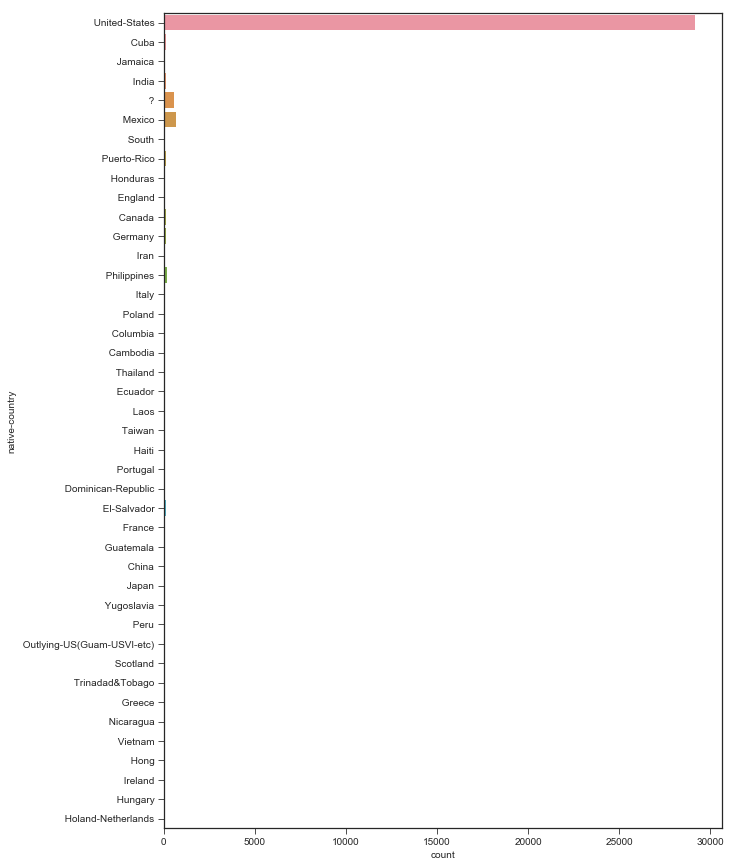

In [102]:
fig = plt.figure(figsize=(10,15))
plt.style.use('seaborn-ticks');
sns.countplot(y="native-country", data=cat);

In [103]:
#sex
pd.crosstab(cat['native-country'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
native-country,,
?,0.749571,0.250429
Cambodia,0.631579,0.368421
Canada,0.677686,0.322314
China,0.733333,0.266667
Columbia,0.966102,0.033898
Cuba,0.736842,0.263158
Dominican-Republic,0.971429,0.028571
Ecuador,0.857143,0.142857
El-Salvador,0.915094,0.084906


In [104]:
cat['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [105]:
cat['native-country']= ['United-States' if x == ' United-States' else 'Others' for x in cat['native-country']]

In [106]:
#sex
pd.crosstab(cat['native-country'],y).apply(lambda r: r/r.sum(), axis=1)

col_0,0,1
native-country,,
Others,0.802418,0.197582
United-States,0.754165,0.245835


In [107]:
cat.dtypes

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
native-country    object
dtype: object

In [108]:
dummy_cat=  pd.get_dummies(cat,drop_first=True)

In [109]:
dummy_cat.head()

,workclass_Federal-gov,workclass_Private,workclass_Self-emp-inc,workclass_workclass1,workclass_workclass2,education_HS-grad,education_Masters,education_Preschool,education_Some-college,education_education1,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,native-country_United-States
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [110]:
X= X.drop(cat,1)

In [111]:
X.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week
0,39,77516,13,1,2174,0,40
1,50,83311,13,1,0,0,13
2,38,215646,9,1,0,0,40
3,53,234721,7,1,0,0,40
4,28,338409,13,0,0,0,40


In [112]:
X.dtypes

age               int64
fnlwgt            int64
education-num     int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

In [113]:
dummy_cat.dtypes

workclass_Federal-gov           uint8
workclass_Private               uint8
workclass_Self-emp-inc          uint8
workclass_workclass1            uint8
workclass_workclass2            uint8
education_HS-grad               uint8
education_Masters               uint8
education_Preschool             uint8
education_Some-college          uint8
education_education1            uint8
education_education2            uint8
education_education3            uint8
marital-status_Never-married    uint8
marital-status_Separated        uint8
marital-status_marital2         uint8
occupation_Handlers-cleaners    uint8
occupation_Other-service        uint8
occupation_Priv-house-serv      uint8
occupation_Prof-specialty       uint8
occupation_Protective-serv      uint8
occupation_Sales                uint8
occupation_Tech-support         uint8
occupation_occupation1          uint8
occupation_occupation2          uint8
relationship_ Not-in-family     uint8
relationship_ Other-relative    uint8
relationship

In [114]:
dummy_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 34 columns):
workclass_Federal-gov           32561 non-null uint8
workclass_Private               32561 non-null uint8
workclass_Self-emp-inc          32561 non-null uint8
workclass_workclass1            32561 non-null uint8
workclass_workclass2            32561 non-null uint8
education_HS-grad               32561 non-null uint8
education_Masters               32561 non-null uint8
education_Preschool             32561 non-null uint8
education_Some-college          32561 non-null uint8
education_education1            32561 non-null uint8
education_education2            32561 non-null uint8
education_education3            32561 non-null uint8
marital-status_Never-married    32561 non-null uint8
marital-status_Separated        32561 non-null uint8
marital-status_marital2         32561 non-null uint8
occupation_Handlers-cleaners    32561 non-null uint8
occupation_Other-service        32561 non-n

In [115]:
X= pd.concat([dummy_cat,X],axis=1)

In [116]:
X.dtypes

workclass_Federal-gov           uint8
workclass_Private               uint8
workclass_Self-emp-inc          uint8
workclass_workclass1            uint8
workclass_workclass2            uint8
education_HS-grad               uint8
education_Masters               uint8
education_Preschool             uint8
education_Some-college          uint8
education_education1            uint8
education_education2            uint8
education_education3            uint8
marital-status_Never-married    uint8
marital-status_Separated        uint8
marital-status_marital2         uint8
occupation_Handlers-cleaners    uint8
occupation_Other-service        uint8
occupation_Priv-house-serv      uint8
occupation_Prof-specialty       uint8
occupation_Protective-serv      uint8
occupation_Sales                uint8
occupation_Tech-support         uint8
occupation_occupation1          uint8
occupation_occupation2          uint8
relationship_ Not-in-family     uint8
relationship_ Other-relative    uint8
relationship

In [117]:
X.head(2)

,workclass_Federal-gov,workclass_Private,workclass_Self-emp-inc,workclass_workclass1,workclass_workclass2,education_HS-grad,education_Masters,education_Preschool,education_Some-college,education_education1,...,race_ Other,race_ White,native-country_United-States,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week
0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,39,77516,13,1,2174,0,40
1,0,0,0,1,0,0,0,0,0,0,...,0,1,1,50,83311,13,1,0,0,13


In [118]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
workclass_Federal-gov,32561.0,0.029483,0.169159,0.0,0.0,0.0,0.0,1.0
workclass_Private,32561.0,0.697030,0.459549,0.0,0.0,1.0,1.0,1.0
workclass_Self-emp-inc,32561.0,0.034274,0.181935,0.0,0.0,0.0,0.0,1.0
workclass_workclass1,32561.0,0.182181,0.386000,0.0,0.0,0.0,0.0,1.0
workclass_workclass2,32561.0,0.000645,0.025388,0.0,0.0,0.0,0.0,1.0
education_HS-grad,32561.0,0.322502,0.467441,0.0,0.0,0.0,1.0,1.0
education_Masters,32561.0,0.052916,0.223869,0.0,0.0,0.0,0.0,1.0
education_Preschool,32561.0,0.001566,0.039546,0.0,0.0,0.0,0.0,1.0
education_Some-college,32561.0,0.223918,0.416874,0.0,0.0,0.0,0.0,1.0
education_education1,32561.0,0.129050,0.335261,0.0,0.0,0.0,0.0,1.0


In [119]:
X.isnull().sum().sort_values(ascending=False)

hours-per-week                  0
occupation_Protective-serv      0
occupation_Priv-house-serv      0
occupation_Other-service        0
occupation_Handlers-cleaners    0
marital-status_marital2         0
marital-status_Separated        0
marital-status_Never-married    0
education_education3            0
education_education2            0
education_education1            0
education_Some-college          0
education_Preschool             0
education_Masters               0
education_HS-grad               0
workclass_workclass2            0
workclass_workclass1            0
workclass_Self-emp-inc          0
workclass_Private               0
occupation_Prof-specialty       0
occupation_Sales                0
capital-loss                    0
occupation_Tech-support         0
capital-gain                    0
sex                             0
education-num                   0
fnlwgt                          0
age                             0
native-country_United-States    0
race_ White   

In [120]:
#Correlation
X_cor=X.corr()

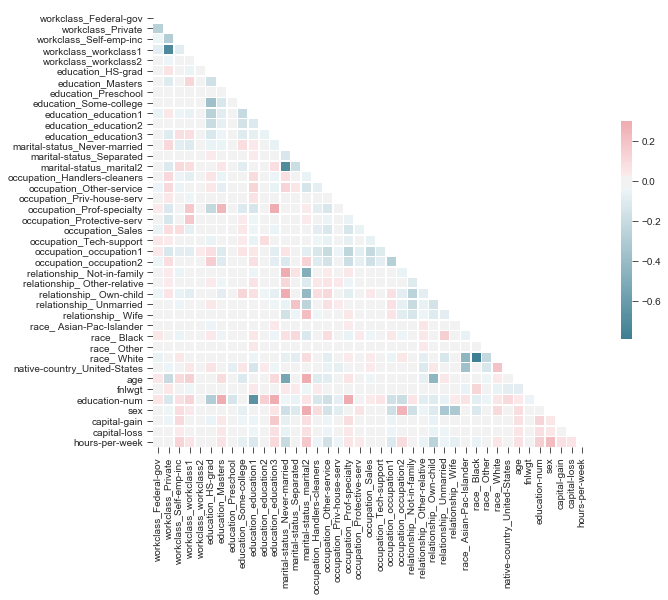

In [121]:
# Generate a mask for the upper triangle
mask = np.zeros_like(X_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(X_cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

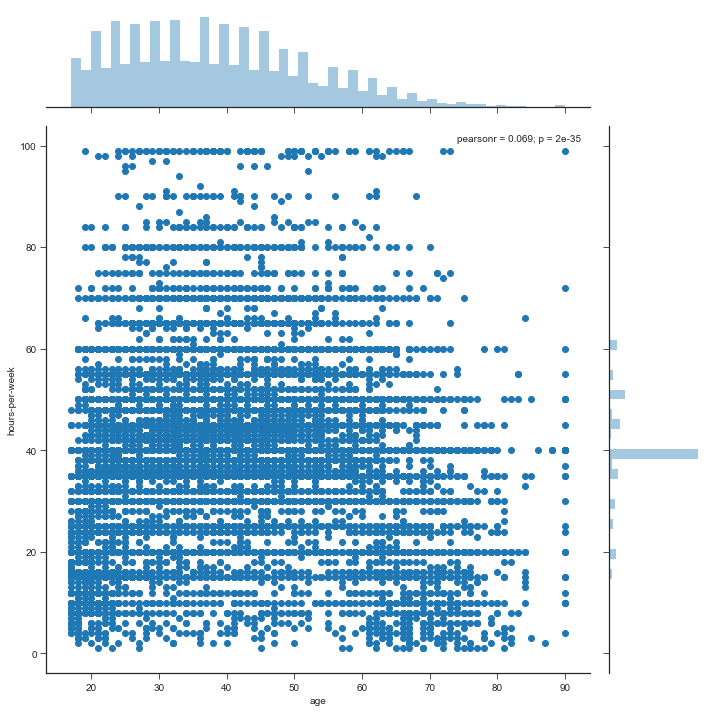

In [122]:
g = sns.jointplot(x = 'age', y = 'hours-per-week',data = X, kind = 'scatter', cmap= 'hot', size=10)

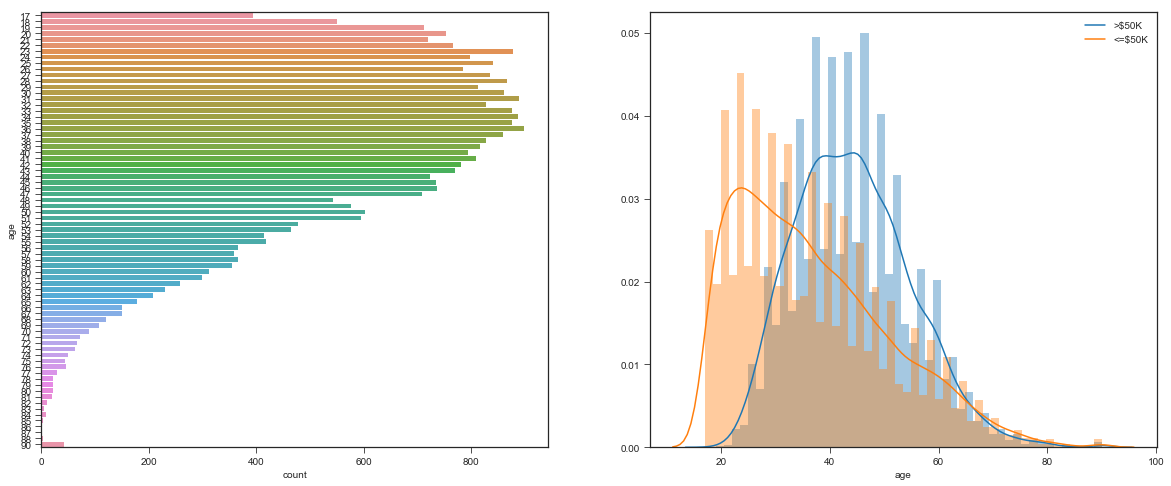

In [123]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,8)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age", data=X)
plt.subplot(1, 2, 2)
sns.distplot(X[y == 1]['age'], kde_kws={"label": ">$50K"});
sns.distplot(X[y == 0]['age'], kde_kws={"label": "<=$50K"});

(30, 60)

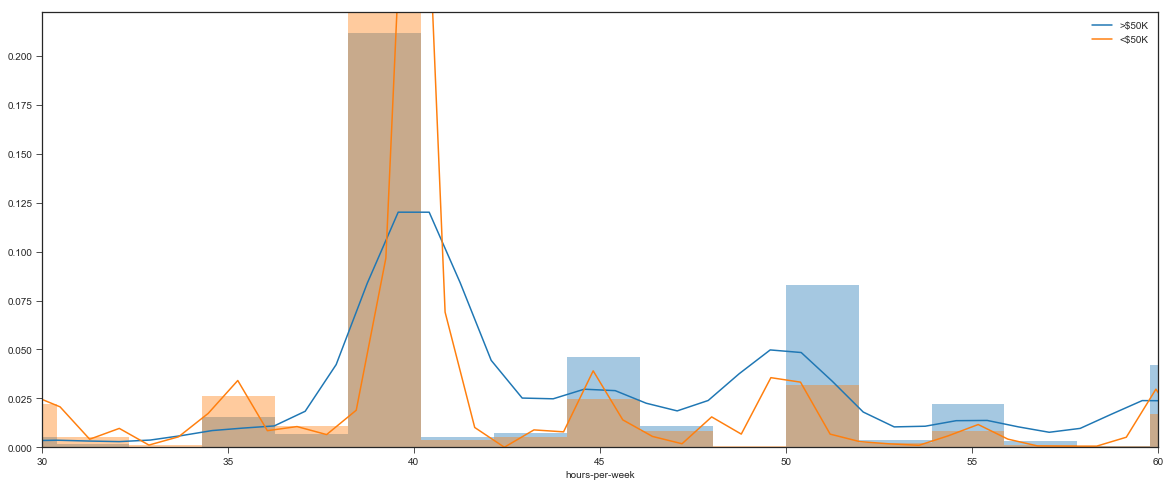

In [124]:
fig = plt.figure(figsize=(20,8));
sns.distplot(X[y == 1]['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(X[y == 0]['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(30, 60)

# EDA


C:\Users\Harsh Yadav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Harsh Yadav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


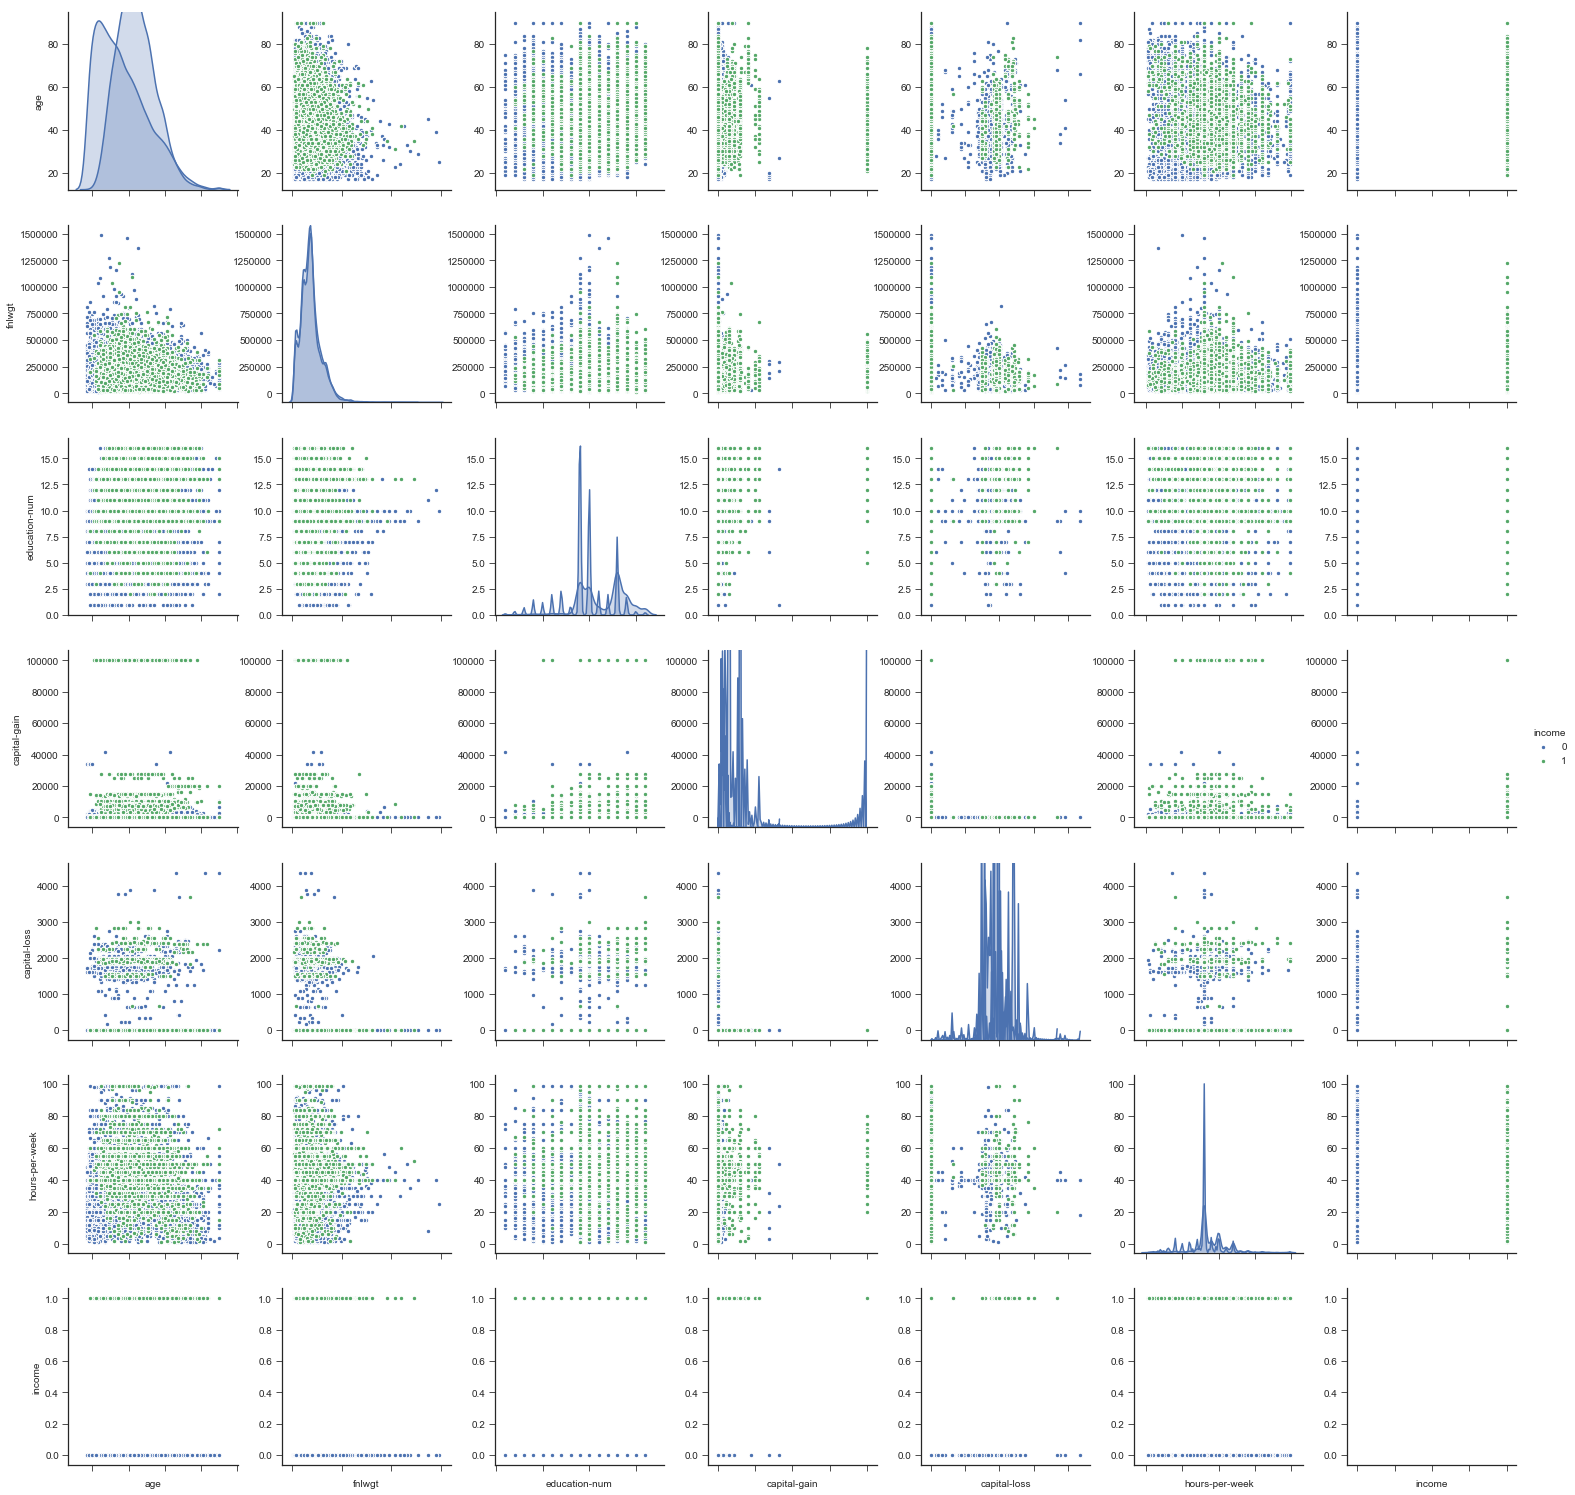

In [125]:
pp = sns.pairplot(df, hue = 'income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) );
pp.set(xticklabels=[]);

# Correlation

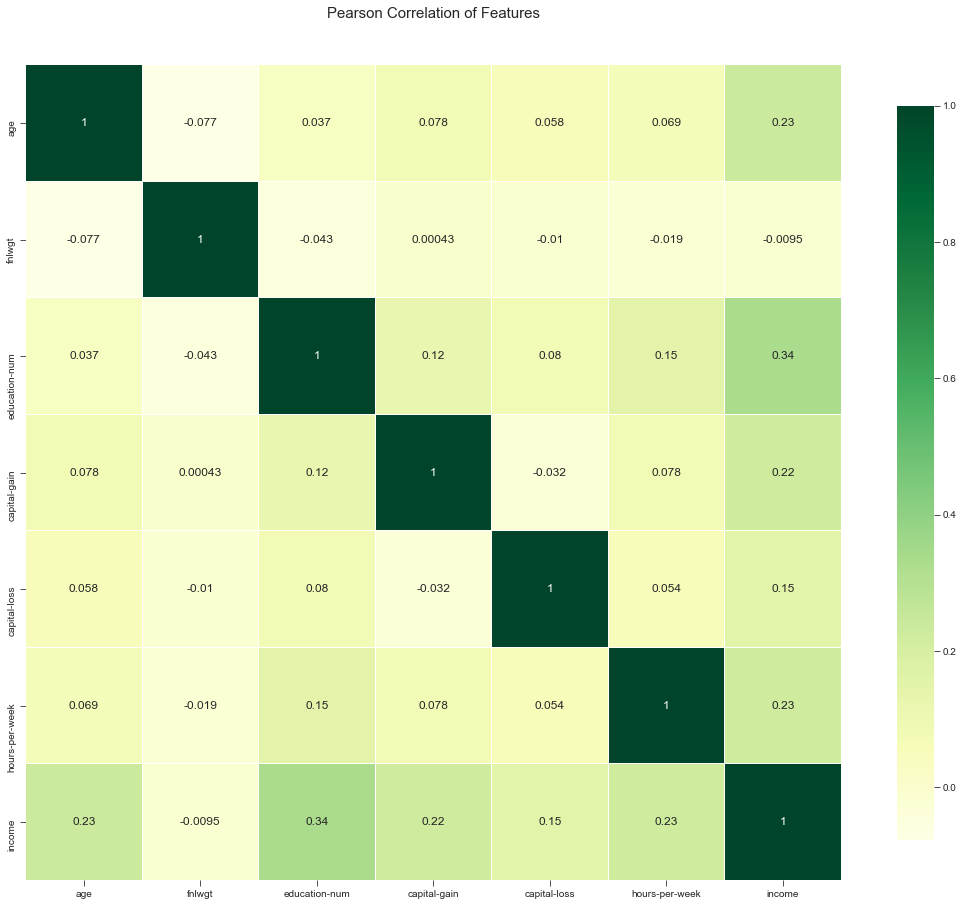

In [126]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

# Occupation vs. Income Level

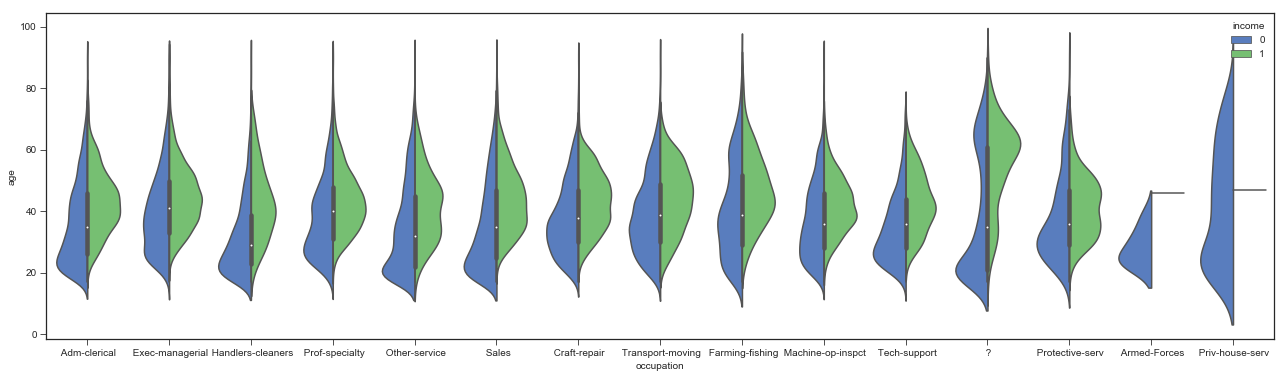

In [127]:
from matplotlib import pyplot 
a4_dims = (22, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)




more senior workers have higher salaries. Armed-forces don't have a high job salaries.

Interestingly, private house sevice has the widest range of age variation, however, the payment is no higher than 50K, indicating that senority doesn't give rise to a higher payment comparing to other jobs.

#    Age VS Race

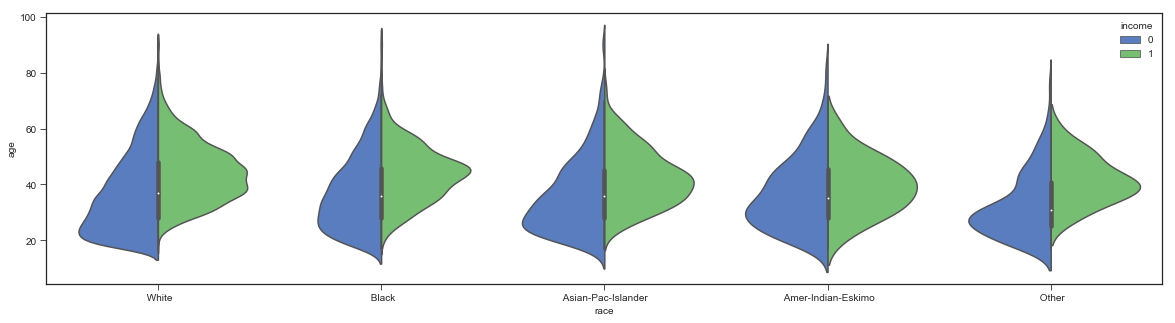

In [128]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)

# Principal Component Analysis (PCA)

Split train test


In [129]:
X=X.iloc[:,:].values

In [130]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=0);

In [131]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.fit_transform(X_test)

C:\Users\Harsh Yadav\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [132]:
X_train

array([[-0.17516897,  0.65848567, -0.18745805, ..., -0.14576122,
        -0.21558621, -0.44509689],
       [-0.17516897,  0.65848567, -0.18745805, ..., -0.14576122,
        -0.21558621, -1.66848877],
       [-0.17516897,  0.65848567, -0.18745805, ..., -0.14576122,
        -0.21558621, -0.03729959],
       ..., 
       [-0.17516897,  0.65848567, -0.18745805, ..., -0.14576122,
        -0.21558621, -0.03729959],
       [-0.17516897, -1.51863593, -0.18745805, ...,  0.89747778,
        -0.21558621,  0.3704977 ],
       [-0.17516897,  0.65848567, -0.18745805, ...,  0.20664405,
        -0.21558621,  0.61517608]])

# Classification Models

#### Perceptron Method

In [133]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)
perception = ppn.score(X_test,y_test)
print('The accuracy of erceptron Method is', perception)

The accuracy of erceptron Method is 0.791303279695


C:\Users\Harsh Yadav\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [134]:
y_pred = ppn.predict(X_test)


In [135]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_pred,y_test)
cm1
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[5232  772]
 [ 927 1210]]
Accuracy :  0.791303279695
Sensitivity :  0.871419053964
Specificity :  0.566214319139


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.85      0.86      6159
          1       0.57      0.61      0.59      1982

avg / total       0.80      0.79      0.79      8141



In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.79130327969536907

# Gaussian Naive Bayes

In [138]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.761454366785


In [139]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_pred,y_test)
cm1
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[6159 1942]
 [   0   40]]
Accuracy :  0.761454366785
Sensitivity :  0.760276509073
Specificity :  1.0


# Linear Support Vector Machine

In [145]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.823608893256


In [148]:
confusion_matrix(y_pred,y_test)

array([[5772, 1049],
       [ 387,  933]], dtype=int64)

In [149]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_pred,y_test)
cm1
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[5772 1049]
 [ 387  933]]
Accuracy :  0.823608893256
Sensitivity :  0.846210233104
Specificity :  0.706818181818


# Logistic Regression

In [152]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.851001105515


In [153]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_pred,y_test)
cm1
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[5739  793]
 [ 420 1189]]
Accuracy :  0.851001105515
Sensitivity :  0.878597672994
Specificity :  0.738968303294


# Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [155]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.842648323302


In [156]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_pred,y_test)
cm1
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[5702  824]
 [ 457 1158]]
Accuracy :  0.842648323302
Sensitivity :  0.873735825927
Specificity :  0.717027863777


####     Logistic Regression is the most accurate model. Accuracy :  0.85100